<a href="https://colab.research.google.com/github/aunghlaingtun/geeky-projects-yun/blob/master/myassingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

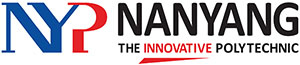

                                      ITI 106 Foundation of Deep learning 2024 Assingment


## Introduction

An Artificial Neural Network (ANN) is a computational model inspired by the human brain, designed to recognize patterns in data. In a feedforward neural network, data flows in a single direction—from input to output—through layers of interconnected neurons. Each neuron processes the input, applies a transformation using weights and biases, and passes the result to the next layer.Its does like a type of network is particularly effective for classification and regression tasks, as it learns complex relationships by adjusting the connections based on training data.

In this Assignment, i aim to develop a fully-connected, feedforward neural network using python language, Tensorflow Libary and  Keras API to classify weather data from the Ang Mo Kio area. The dataset includes various meteorological features such as temperature, wind speed, and rainfall measurements.Assingment Objective is  to classify days as either “rainy” or “non-rainy” based on these features.

To achieve this, i will follow a structured approach that includes as bleow:

1.   Data Pre-processing
2.   Data Transformed
3.   Model Definition
4.   Model Training
5.   Model Evaluation
6.   Vasulization of model performance

And then performing  model  fine-tune the hyperparameters to enhance the model’s accuracy and robustness.

**TensorFlow**, developed by Google, is an open-source library designed for large-scale machine learning and numerical computation, offering a robust ecosystem of tools for building and deploying models.

**Keras** is a high-level neural networks API in Python that runs on top of TensorFlow and other frameworks like Theano and CNTK. It’s designed for fast experimentation, making deep learning accessible and efficient for developers.

TensorFlow and Keras are ideal for this assignment, providing a powerful, flexible framework for building and tuning neural networks. TensorFlow handles complex computations efficiently, while Keras offers an intuitive, high-level API for fast experimentation. Together, they enable efficient development of an accurate and scalable rainfall prediction model.

# 1. Data Pre processing

Data preprocessing is a crucial step in data science-based and machine learning. It involves transforming raw data into a clean, structured format suitable to use it for mechining learning model.

Using `angmokio.csv` dataset that for data preprocessing involved filling missing values, extracting date components (year, month, day), encoding the "Rainy" target as binary, and standardizing continuous features like temperature and wind speed. Finally, split the data into training and testing sets for model training.

Datasets used in the assingment that from Historical Daily Weather Record of singapore data. This dataset can be reused and cited in research publications that from NEA website as below:

https://data.gov.sg/datasets/d_03bb2eb67ad645d0188342fa74ad7066/view

1.1 Construct DataFrame


---


Importing data into Google Drive and construct a DataFrame with pandas as

1.   upload 'angmokio.csv'  file to Google Drive
2.   Mount google drive using from google.colab for import drive
3.   locat file path
4.   import pandas and read it data

And then manipulate and analyze the data as needed.


In [227]:
#importing necessary library
import pandas as pd
import numpy as np
from google.colab import drive

In [142]:
# Mount Google Drive
drive.mount('/content/drive',force_remount=True)

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/angmokio.csv')

Mounted at /content/drive


Calling Dataframe from inport data as below:

In [143]:
data

,Unnamed: 0,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,Ang Mo Kio,2014,1,1,0.0,0.0,0.0,0.0,26.3,28.7,24.5,7.2,29.9
1,1,Ang Mo Kio,2014,1,2,0.0,0.0,0.0,0.0,26.9,30.4,24.6,8.2,32.0
2,2,Ang Mo Kio,2014,1,3,8.8,8.6,8.8,8.8,26.5,30.1,24.8,7.1,29.5
3,3,Ang Mo Kio,2014,1,4,1.4,1.4,1.4,1.4,26.6,30.9,24.7,4.2,30.2
4,4,Ang Mo Kio,2014,1,5,7.2,1.6,3.2,5.2,24.5,25.5,23.3,5.2,24.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2552,Ang Mo Kio,2020,12,27,8.6,7.6,8.6,8.6,NaN,NaN,NaN,NaN,NaN
2553,2553,Ang Mo Kio,2020,12,28,0.2,0.2,0.2,0.2,27.8,31.6,25.3,7.2,32.4
2554,2554,Ang Mo Kio,2020,12,29,2.4,2.0,2.2,2.4,26.6,31.1,24.7,4.6,27.4
2555,2555,Ang Mo Kio,2020,12,30,0.0,0.0,0.0,0.0,27.7,32.0,24.8,6.3,31.7


### 1.2. Handling for incomplete data


---



In [144]:
# Filter to show only rows with NaN values
nan_rows = data[data.isnull().any(axis=1)]

# Display the rows with NaN values
nan_rows

,Unnamed: 0,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
58,58,Ang Mo Kio,2014,2,28,0.0,0.0,0.0,0.0,NaN,NaN,NaN,8.8,37.4
290,290,Ang Mo Kio,2014,10,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,405,Ang Mo Kio,2015,2,10,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
406,406,Ang Mo Kio,2015,2,11,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
407,407,Ang Mo Kio,2015,2,12,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,2548,Ang Mo Kio,2020,12,23,1.6,1.6,1.6,1.6,NaN,NaN,NaN,NaN,NaN
2549,2549,Ang Mo Kio,2020,12,24,8.4,6.8,7.2,8.0,NaN,NaN,NaN,NaN,NaN
2550,2550,Ang Mo Kio,2020,12,25,1.4,1.4,1.4,1.4,NaN,NaN,NaN,NaN,NaN
2551,2551,Ang Mo Kio,2020,12,26,17.2,10.4,13.8,15.2,NaN,NaN,NaN,NaN,NaN


### 1.3. Data cleaning


---


DataFrame information

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2557 non-null   int64  
 1   Station                        2557 non-null   object 
 2   Year                           2557 non-null   int64  
 3   Month                          2557 non-null   int64  
 4   Day                            2557 non-null   int64  
 5   Daily Rainfall Total (mm)      2512 non-null   float64
 6   Highest 30 min Rainfall (mm)   2508 non-null   float64
 7   Highest 60 min Rainfall (mm)   2506 non-null   float64
 8   Highest 120 min Rainfall (mm)  2506 non-null   float64
 9   Mean Temperature (°C)          2509 non-null   float64
 10  Maximum Temperature (°C)       2509 non-null   float64
 11  Minimum Temperature (°C)       2509 non-null   float64
 12  Mean Wind Speed (km/h)         2512 non-null   f

Removeing unnecessary data and filling NaN data to value.


In [146]:
data.columns

Index(['Unnamed: 0', 'Station', 'Year', 'Month', 'Day',
       'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)',
       'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)',
       'Mean Temperature (°C)', 'Maximum Temperature (°C)',
       'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)',
       'Max Wind Speed (km/h)'],
      dtype='object')

In [147]:
data1 = data
data1.shape

(2557, 14)

In [148]:
# Remove a single column
data1 = data1.drop('Station', axis=1)
data1.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
       'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)',
       'Highest 120 min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)'],
      dtype='object')

In [149]:
data1.fillna(0, inplace=True)
data1
data1.shape

(2557, 13)

In [150]:
#print out data shape
data.shape # that will tell me numbers of rows and colums
data1.shape

(2557, 13)

In [151]:
# Rename Columns from "Unnamed :0 " to "N0":
data1.rename(columns={'Unnamed: 0': 'N0'}, inplace=True)
# Now,  can access the columns:
data1.columns

Index(['N0', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
       'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)',
       'Highest 120 min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)'],
      dtype='object')

### 1.4.Numerical display of data summary


---


In [152]:
data1.shape

(2557, 13)

In [153]:
# Calculate the statistical summary for numerical
numerical_summary = data1.describe()
# Display the summary
numerical_summary

,N0,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.00000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,1278.000000,2017.000782,6.522487,15.730935,6.077943,3.826633,4.702659,5.26402,27.436136,31.355925,24.789441,7.455338,31.463238
std,738.286643,2.000587,3.449499,8.802361,12.417081,7.577169,9.638519,10.89281,3.980821,4.648557,3.698270,3.973305,8.492010
min,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,639.000000,2015.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.00000,27.100000,31.000000,24.200000,4.800000,26.600000
50%,1278.000000,2017.000000,7.000000,16.000000,0.200000,0.200000,0.200000,0.20000,28.000000,32.200000,25.200000,6.300000,31.000000
75%,1917.000000,2019.000000,10.000000,23.000000,6.000000,3.800000,4.200000,4.80000,28.900000,33.100000,26.200000,8.600000,36.000000
max,2556.000000,2020.000000,12.000000,31.000000,101.600000,60.400000,88.000000,98.60000,31.100000,35.800000,28.600000,22.000000,83.900000


In [154]:
data1.shape

(2557, 13)

### 1.5. Distribution of data plot


---

Dataframe (data1).boxplot
Create a box plot for all numerical columns in a single graph to visualize theirdistribution, range, and outliers. Explain any visible trends or outliers in plot.

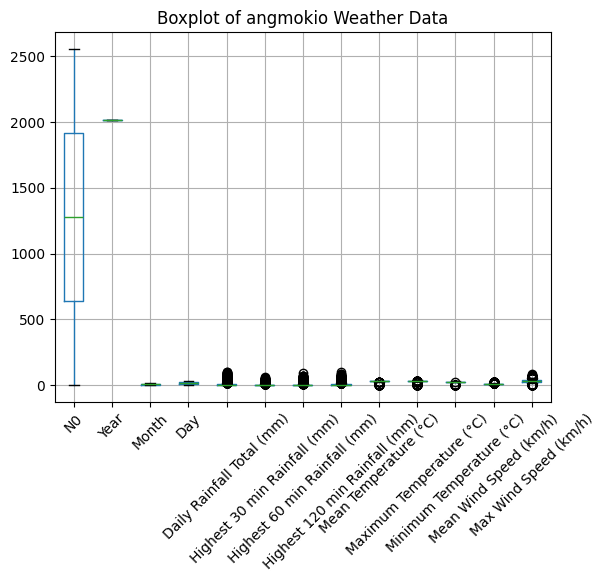

In [155]:
import matplotlib.pyplot as plt
# Data  is already loaded into a DataFrame named as 'data1'
# Create a boxplot for the specified columns
data1.boxplot(column=['N0', 'Year', 'Month', 'Day',  'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)',
                      'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)', 'Mean Temperature (°C)',
                      'Maximum Temperature (°C)', 'Minimum Temperature (°C)','Mean Wind Speed (km/h)',
                      'Max Wind Speed (km/h)'])
# Show the plot
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.title('Boxplot of angmokio Weather Data')
plt.show()

In [156]:
data1.shape # print Data shape

(2557, 13)

In [157]:
cleaned_data= data1.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv', index=False) # save as cleanded data


# **2**. Data transformation



Data transformation is the process of converting raw data into a format that’s more suitable for analysis or modeling. This typically includes steps like normalization (scaling data to a specific range), standardization (adjusting data to have a mean of 0 and a standard deviation of 1), encoding categorical variables (turning categories into numerical values), handling missing values (by imputing or removing them),
These transformations improve data quality, enhance consistency, reduce noise, and help models capture key patterns for more accurate analysis.



In [158]:
import pandas as pd
import numpy as np
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv')
df.head(1)

,N0,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,2014,1,1,0.0,0.0,0.0,0.0,26.3,28.7,24.5,7.2,29.9


### 2.1. Classification

---
Creating a Target Variable of y for column name as 'Rainy' so that to represent rainy days as 1 and non-rainy days as 0 that for a binary classification problem.

In [159]:
# Create a new target variable for classification
df['Rainy'] = np.where(df['Daily Rainfall Total (mm)'] > 0, 1, 0)

#print data frame for checked updata data as below:
df.head(2)

,N0,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Rainy
0,0,2014,1,1,0.0,0.0,0.0,0.0,26.3,28.7,24.5,7.2,29.9,0
1,1,2014,1,2,0.0,0.0,0.0,0.0,26.9,30.4,24.6,8.2,32.0,0


In [160]:
df.tail(1)

,N0,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Rainy
2556,2556,2020,12,31,5.2,4.6,5.2,5.2,27.0,31.7,24.9,6.0,29.1,1


In [161]:
df.shape

(2557, 14)

### 2.2. Select features and target variable

---
My model first choose X and y data that i have trained and not performing well.

```
# Select features and target variable
X = data[['Year', 'Month', 'Day', 'Mean Temperature (°C)', 'Maximum Temperature (°C)',
          'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']].values
y = data['Rainy'].values
```



In [162]:
#slect feature and target variable for the model
X = df[['Year', 'Month', 'Day', 'Mean Temperature (°C)', 'Maximum Temperature (°C)',
          'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)',
          'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)',
          'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']].values
y = df['Rainy'].values

### 2.3. Standardization

---
There are process adjusts the distribution of each feature so that it follows a standard normal distribution. Centering data to have a mean of 0 and scaling it to have a standard deviation of 1 with below code:

In [163]:
# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print(X)

[[-1.50024453 -1.60126653 -1.67384812 ... -0.50512023 -0.4879981
  -0.48335095]
 [-1.50024453 -1.60126653 -1.56022002 ... -0.50512023 -0.4879981
  -0.48335095]
 [-1.50024453 -1.60126653 -1.44659192 ...  0.63009034  0.42518377
   0.32467943]
 ...
 [ 1.49946243  1.58822597  1.50773868 ... -0.24111777 -0.25970263
  -0.26297903]
 [ 1.49946243  1.58822597  1.62136678 ... -0.50512023 -0.4879981
  -0.48335095]
 [ 1.49946243  1.58822597  1.73499488 ...  0.10208542  0.05160937
  -0.00587845]]


### 2.4. Data splitting

---

Splitting the dataset into training and testing sets.

**Explained code details of each line :**

Get Dataset Size:
```
dataset_size = len(X)
```
This calculates the total number of examples (or rows) in the dataset.
Define Training Set Size:

```
train_size = int(dataset_size * 0.8)
```
This sets the training set size to 80% of the total dataset, converting it to an integer. This leaves the remaining 20% for the test set.
Split the Features (X):

```
X_train, X_test = X[:train_size], X[train_size:]
```
X_train takes the first 80% of the data, and X_test takes the remaining 20%. This divides the feature data into training and testing sets.
Split the Target (y):

```
y_train, y_test = y[:train_size], y[train_size:]
```

Similarly, this divides the target variable (y) into training and testing sets using the same 80/20 split.

In [164]:
# Split the data into training and testing sets using NumPy
dataset_size = len(X)  #Get Dataset Size: dataset_size = len(X)
train_size = int(dataset_size * 0.8) # Define Training Set Size
X_train, X_test = X[:train_size], X[train_size:] #
y_train, y_test = y[:train_size], y[train_size:]


### 2.5. Printing  for dataset shape italicised text

---
Purpose
This split allows you to train the model on 80% of the data and then evaluate it on the remaining 20%, helping assess its performance on unseen data.

In [165]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2045, 12)
X_test shape: (512, 12)
y_train shape: (2045,)
y_test shape: (512,)


### 2.6. Collection Train Dataset and Test Dataset

---

In [166]:
import pandas as pd
# Use the actual feature names based on your dataset
feature_names = ['Year', 'Month', 'Day',
                 'Mean Temperature (°C)',
                 'Maximum Temperature (°C)',
                 'Minimum Temperature (°C)',
                 'Mean Wind Speed (km/h)',
                 'Max Wind Speed (km/h)',
                 'Daily Rainfall Total (mm)',
                 'Highest 30 min Rainfall (mm)',
                 'Highest 60 min Rainfall (mm)',
                 'Highest 120 min Rainfall (mm)']

# Convert the training and testing sets to DataFrames
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)
y_train_df = pd.DataFrame(y_train, columns=['Rainy'])  # target name
y_test_df = pd.DataFrame(y_test, columns=['Rainy'])

# Combine features and targets for training and testing sets
train_data = pd.concat([X_train_df, y_train_df], axis=1)
test_data = pd.concat([X_test_df, y_test_df], axis=1)

# Save to CSV files
train_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Traing and testing datasets/train_data.csv', index=False)  # Save training data
test_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Traing and testing datasets/test_data.csv', index=False)    # Save testing data

print("Training and testing datasets saved as train_data.csv and test_data.csv")


Training and testing datasets saved as train_data.csv and test_data.csv


In [167]:
df.shape

(2557, 14)

# 3.Model Definition
---

The model defined in the code is a feedforward fully connected neural network built using TensorFlow and Keras.Each components are in a breakdown as :

1. **Input Layer**:
   - `input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))` specifies the input size based on the number of features in `X_train`.

2. **Hidden Layers**:
   - **First Layer**: A dense layer with 64 neurons, using the ReLU activation function and L2 regularization (`kernel_regularizer=l2(0.01)`).
   - **Second Layer**: A dense layer with 32 neurons, also utilizing the ReLU activation function and L2 regularization.
   - **Dropout Layers**: A dropout rate of 0.5 is applied after each dense layer to mitigate overfitting by randomly setting half of the input units to zero at each update during training.

3. **Output Layer**:
   - A dense layer with a single neuron and `sigmoid` activation for binary classification, predicting the probability that a day is "rainy" or "not rainy".

4. **Compilation and Loss Function**:
   - The model is compiled using the `Adam` optimizer, a `binary_crossentropy` loss function suitable for binary classification, and an accuracy metric to monitor model performance.

5. **Training with Early Stopping**:
   - Although not explicitly defined in the code snippet, early stopping can be implemented to monitor validation loss and stop training when the model's performance ceases to improve, thereby preventing overfitting.

Overall, the model serves as a robust binary classifier for the rainfall prediction task, balancing complexity and regularization. Further fine-tuning of layer sizes, dropout rates, or regularization strength  will be exercising based on training and validation performance.




```
# Define the input layer
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))

# Define the model with L2 regularization
model = tf.keras.Sequential([
    input_layer,
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
```



### 3.1. Importing necessary libraries  

---

In [195]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

### 3.2 Model building

---

Demonstrate for build a simple Keras Sequential model as bleow code:



In [211]:
# Define the input layer
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))

# Define the model with L2 regularization
model = tf.keras.Sequential([
    input_layer,
    tf.keras.layers.Dense(64, activation='relu'),#kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),# kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


### 3.3 My Model Summary


---
Before proceeding, it was  helpful to review the model i have created. Using the function of  `model.summary()` that  provides a detailed overview of the model's structure, which can be particularly useful for identifying any errors in the model specification.

In [212]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

### 3.4 Compiling


---
Compiling is prepares the model for training by defining how it will learn and be evaluated.

Thereforce after the model is set up correctly,then  proceed to compile it. Enter the following code to compile my ANN model:

```python
#Compile the model for binary classification
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

```


In [213]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

### 3.5.Creating Checkpoint


---
The way us to helping capturing the weights of our model with creating checkpoit can be done .
This callback saves the model weights during training based on the specified conditions.

There are 2 ways to capture the weights

1. Using ```get_weights()```. This will capture the weights of the neural network of a particular layer.

2. Using ```save_weights()```. This will capture the weights of all layers.

For convenience, we will use the second method.

Add the following codes to create a checkpoint by saving all the weights of the model.

In [198]:
# Enter your codes here to save the weights
model.save_weights("/content/drive/MyDrive/Colab Notebooks/Traing and testing datasets/initial_weights.weights.h5") # h5 format /content/initial_weights.weights.h5

Create TensorBoard callback

In [214]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Set up TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


# 4.Model Training

**Training the model means adjusting its weights in such a way that it can transform the features(x) into the target(y).**

The fit method in Keras is used to train the model on the training data. It takes several parameters, including the input data (X_train), target data (y_train), number of epochs (iterations over the dataset), batch size (number of samples per gradient update), and validation split (fraction of the training data to be used as validation data).

In this Assingmnet ,i build a neural network that predicts whether it will be "Rainy" based on the provided weather features, i do need to set it up as a binary classification problem since the target ("Rainy") is  binary (e.g., 1 for "Rainy" and 0 for "Not Rainy").

Train the model on the training data with a validation split of 20%. The training history is captured in the history object.

In [217]:
# Train the model with validation split
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5994 - loss: 0.6716 - val_accuracy: 0.8313 - val_loss: 0.4859
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7663 - loss: 0.4946 - val_accuracy: 0.8533 - val_loss: 0.3826
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8157 - loss: 0.4086 - val_accuracy: 0.8655 - val_loss: 0.3430
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8456 - loss: 0.3547 - val_accuracy: 0.8557 - val_loss: 0.3282
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8486 - loss: 0.3532 - val_accuracy: 0.8680 - val_loss: 0.3167
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8649 - loss: 0.3428 - val_accuracy: 0.8460 - val_loss: 0.3187
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8623 - loss: 0.3197 - val_accuracy: 0.8606 - val_loss: 0.3081
Epoch 8/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.3274 - val_accuracy: 0.

# 5.Model Evaluation

Evaluate the model’s performance on the test set and print out for model's **loss** & **accuracy**.

In [218]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("loss:", test_loss)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9215 - loss: 0.3145 
loss: 0.4487835764884949


In [219]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("accuracy", test_acc)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9215 - loss: 0.3145 
accuracy 0.900390625


#6.Make Predictions

Make predictions on the test set and convert probabilities to binary predictions

In [220]:
# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions




16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


predictions are made using the predict method, and probabilities are converted to binary class labels and below code print for all **X_test data point**.

```
# Print predictions for all X_test data point
predictions = model.predict(X_test)

# Print predictions in groups of 10 rows by 5 columns
for i in range(0, len(X_test), 10):
    print(f"Group {i // 10 + 1}:")
    for j in range(i, min(i + 10, len(X_test))):
        print(f"Prediction for data point {j + 1}: {predictions[j]}")
    print("\n" + "-"*50 + "\n")


```


In [221]:
predictions = model.predict(X_test)

# Print predictions in groups of 10 rows by 5 columns
for i in range(0, len(X_test), 10):
    print(f"Group {i // 10 + 1}:")
    for j in range(i, min(i + 10, len(X_test))):
        print(f"Prediction for data point {j + 1}: {predictions[j]}")
    print("\n" + "-"*50 + "\n")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Group 1:
Prediction for data point 1: [0.00744716]
Prediction for data point 2: [0.00728204]
Prediction for data point 3: [0.00325827]
Prediction for data point 4: [0.00267688]
Prediction for data point 5: [0.0013291]
Prediction for data point 6: [0.00100554]
Prediction for data point 7: [0.9998115]
Prediction for data point 8: [0.00245825]
Prediction for data point 9: [0.00225231]
Prediction for data point 10: [0.9999999]

--------------------------------------------------

Group 2:
Prediction for data point 11: [0.00043514]
Prediction for data point 12: [0.00102892]
Prediction for data point 13: [0.00056802]
Prediction for data point 14: [0.00050422]
Prediction for data point 15: [0.00054491]
Prediction for data point 16: [0.00046024]
Prediction for data point 17: [0.00032911]
Prediction for data point 18: [0.00121715]
Prediction for data point 19: [1.]
Prediction for data point 20: [0.0054317]

-------------------------------------------------

# 6.Vasulation of Model performance

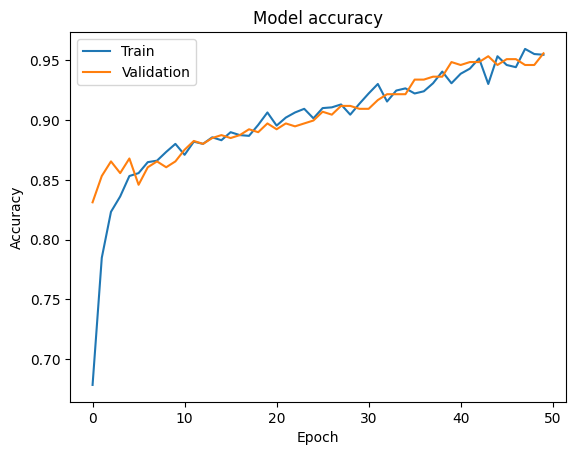

In [222]:
# Documenting metrics and decisions
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

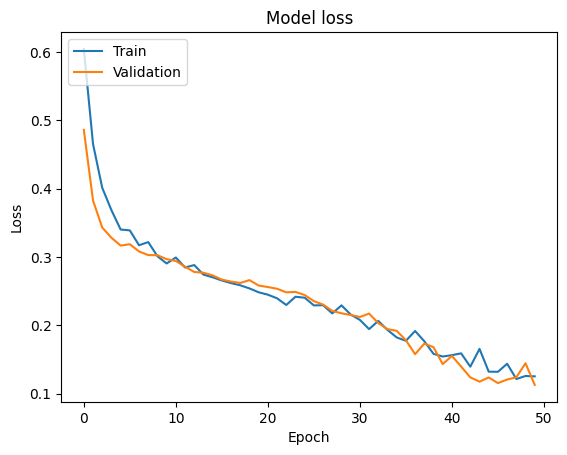

In [223]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Tensor Board

In [226]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Set up TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Launch TensorBoard
%load_ext tensorboard
%tensorboard --log_dir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2024-11-05 18:26:36.095219: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 18:26:36.119218: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-05 18:26:36.126495: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 18:26:37.477242: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Error: A logdir or db must be specified. For example `tensorboard --logdir mylogdir` or `tensorboard --db sqlite:~/.tensorboard.db`. Run `tensorboard --helpfull` for de

# .......................................Completed Model.......................

---



My experiment :

**Y_tain and y_test**:These arrays represent targets data with 1 D arrayshape: (2045,) and (512,) indicate that y_train has 2045 elements (target values corresponding to X_train samples), and y_test has 512 elements (target values corresponding to X_test samples).

Tensor board
```
# Set up TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Launch TensorBoard
%load_ext tensorboard
%tensorboard --logdir logs/fit

```






model with out regularzer L2 with poor results


**without regularizer=L2 **


```
# Define the input layer
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))

# Define the model
model = tf.keras.Sequential([
input_layer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
```




# 6. Visualization of Model Performance

Base on the above parameter with training resuls that model is achieving an accuracy of approximately 60.35% on the test set, with a training accuracy of around 63.10% and a loss of 1.0940.In order to model development,  improve model performance of 5 step to condideration with below:


**1. Hyperparameter Tuning**
Learning Rate: Set the learning rate to 0.0005 as you mentioned, which is a small step size that can help the model converge more precisely.
Batch Size: Smaller batch sizes (e.g., 16, 32) might improve generalization, especially if your model is overfitting. Experiment with different batch sizes and observe the impact on training stability and model accuracy.

**2. Model Architecture**
Number of Layers and Neurons: Increasing the number of hidden layers or neurons per layer can enable the model to capture more complex patterns. For example, try adding an extra dense layer or increasing neurons in existing layers (e.g., 64 or 128 neurons per layer).
Activation Functions: Try switching from ReLU to other  in hidden layers and monitor changes in training and validation performance that tends to improve learning dynamics for deep networks. ( example: RelU to ELU)

**3. Regularization**
L2 Regularization: Since you’re already using L2 regularization, experiment with varying the L2 penalty term. Lowering the L2 regularization term (e.g., from 0.01 to 0.001) may help if your model is underfitting, while increasing it may prevent overfitting.
Dropout Rate: Adjusting dropout rates between 0.2 to 0.3 can help optimize generalization. If underfitting is suspected, reduce the dropout rate slightly; if overfitting, try increasing it.

**4. Re create Data Pre-processing**
Feature Engineering: Create features that might better capture the rainfall patterns, such as rolling averages or seasonal features (e.g., monthly or seasonal rainfall averages).
Normalization: Ensure all features are properly normalized, as it can significantly affect training performance.

5**. Training Process**
Epochs: Increase the number of epochs gradually while monitoring the validation accuracy and loss. With more epochs, the model may discover finer patterns, but be cautious of overfitting.
Early Stopping: Implement early stopping with a patience parameter (e.g., 5–10 epochs) based on validation loss to avoid overfitting

# Model development

Base on the above parameter and training resuls that model is achieving an accuracy of approximately 60.35% on the test set, with a training accuracy of around 63.10% and a loss of 1.0940.In order to model development,  improve model’s performance of 5 step to condideration with below:

**1. Hyperparameter Tuning**

*   Learning Rate : Experiment with different learning rates. Sometimes a smaller learning rate can help the model converge to a better solution.
therefore set 0.00002.

*   Batch Size: Tried different batch sizes. Smaller batch sizes can provide a regularizing effect and improve generalization.thereforce used bath size as 16.


**2. Model Architecture**

*   Number of Layers and Neurons: Experiment with adding more layers or increasing the number of neurons in each layer.
*   Activation Functions: Try using different activation functions like Leaky ReLU or ELU instead of ReLU.


**3. Regularization**

*   L2 Regularization: i already have L2 regularization, but  can try adjusting the regularization parameter
*   Dropout Rate: Experiment with different dropout rates. Sometimes a lower dropout rate can help if the model is underfitting


**4. Data Pre-processing**

*   Feature Engineering: Create new features that might be more informative for the model at sometimes
*   Normalization: Ensure that all features are properly normalized.


**5. Training Process**

*   Epochs: Train the model for more epochs to see if the performance improves.
*   Early Stopping: Use early stopping to prevent overfitting. This will stop training when the validation loss stops improving.


In [74]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')
# Load the data
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/angmokio.csv')



# Handle missing values
data = data.dropna() #dropped all those value as Nan

# Create a new target variable for classification
data['Rainy'] = np.where(data['Daily Rainfall Total (mm)'] > 0, 1, 0)

# Select features and target variable
#X = data[['Year', 'Month', 'Day', 'Mean Temperature (°C)', 'Maximum Temperature (°C)',
          #'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']].values
#y = data['Rainy'].values

# Select new features and target variable
X = data[['Year', 'Month', 'Day', 'Mean Temperature (°C)', 'Maximum Temperature (°C)',
          'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)',
          'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)',
          'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']].values
y = data['Rainy'].values

# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Split the data into training and testing sets using NumPy
dataset_size = len(X)
train_size = int(dataset_size * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the input layer
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))

# Define the model with L2 regularization
model = tf.keras.Sequential([
    input_layer,
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#printing model information
model.summary()

# Compile the model
optimizer = Adam(learning_rate=0.0002)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with validation split and early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=70, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("loss:", test_loss)
print("accuracy", test_acc)

# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Documenting metrics and decisions
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 50)

In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/angmokio.csv')

# Handle missing values
data = data.dropna()  # Dropped all rows with NaN values

# Create a new target variable for classification
data['Rainy'] = np.where(data['Daily Rainfall Total (mm)'] > 0, 1, 0)

# Select features and target variable
#X = data[['Year', 'Month', 'Day', 'Mean Temperature (°C)', 'Maximum Temperature (°C)',
          'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']].values
#y = data['Rainy'].values

# Select features and target variable
X = data[['Year', 'Month', 'Day', 'Mean Temperature (°C)', 'Maximum Temperature (°C)',
          'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)',
          'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)',
          'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)', 'Station']].values
y = data['Rainy'].values


# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Split the data into training and testing sets using NumPy
dataset_size = len(X)
train_size = int(dataset_size * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the input layer
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))

# Define the model with L2 regularization
model = tf.keras.Sequential([
    input_layer,
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print model summary
model.summary()

# Compile the model
optimizer = Adam(learning_rate=0.00002)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Set up TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with validation split, early stopping, and TensorBoard callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2,
                    callbacks=[early_stopping, tensorboard_callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("loss:", test_loss)
print("accuracy", test_acc)

# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Launch TensorBoard
%load_ext tensorboard
%tensorboard --logdir logs/fit


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 52)